# Example-1. Jaynes-Cummings Model

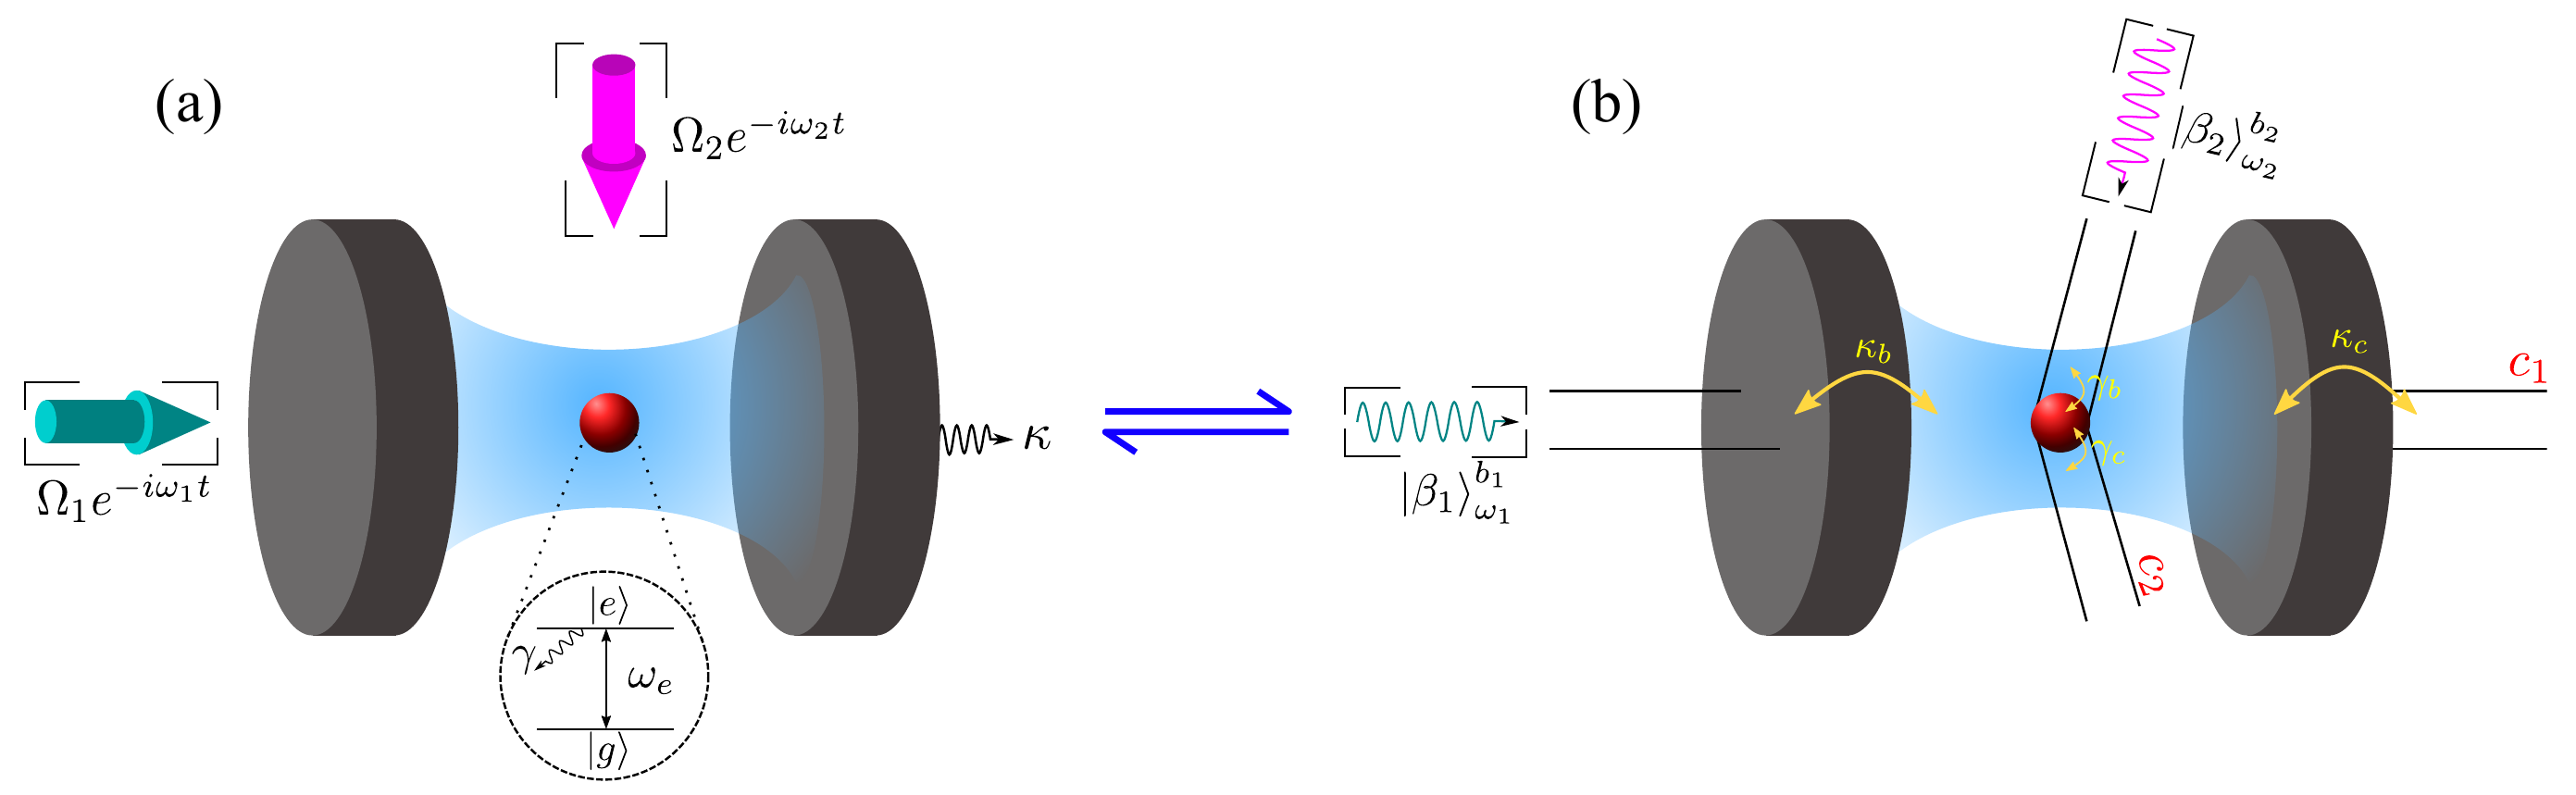

## The effective Hamilitonian

$$H_{\text{eff}}=\left(\omega_c-\frac{i\kappa}{2}\right)a^\dagger a+\left(\omega_e-\frac{i\gamma}{2}\right)\sigma^\dagger \sigma+g\left(a\sigma^\dagger+\sigma a^\dagger\right)$$

In [1]:
from qcs_phy import qcs

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# system fixed parameters
κ = 1
γ = 0.2 * κ
g = 0.6 * κ

### Figure 4.(a)
$$\omega_e-\omega_c=\kappa,\Omega_2=3\Omega_1,\omega_1=\omega_2=\omega_d$$

In [4]:
# system parameters
ωc = 0
ωe = ωc + κ
η = 3
ωd = np.linspace(-7, 5, 4000)

In [5]:
# create effective Hamiltonian
Heff = []
Heff.append([(ωc-1j*κ/2), ('ad', 0), ('a', 0)])
Heff.append([(ωe-1j*γ/2), ('sp', 0), ('sm', 0)])
Heff.append([g, ('ad', 0), ('sm', 0)])
Heff.append([g, ('a', 0), ('sp', 0)])

In [7]:
# create Input and output channels
mode1 = [np.sqrt(κ/2), ('a', 0)]
mode2 = [np.sqrt(γ/2), ('sm', 0)]

Input1 = qcs.Input_channel('b1', mode1, ωd)
Input2 = qcs.Input_channel('b2', mode2, ωd)
Output = qcs.Output_channel('c1', mode1)

In [8]:
# calculate second-order ETCF
result1 = qcs(Heff, Input1, Output)
result2 = qcs(Heff, [Input1, Input2], Output, ratio=[1/np.sqrt(κ/2), η/np.sqrt(γ/2)])
g2_dc = result1.calculate_quantity('c1c1')
g2_dce = result2.calculate_quantity('c1c1')

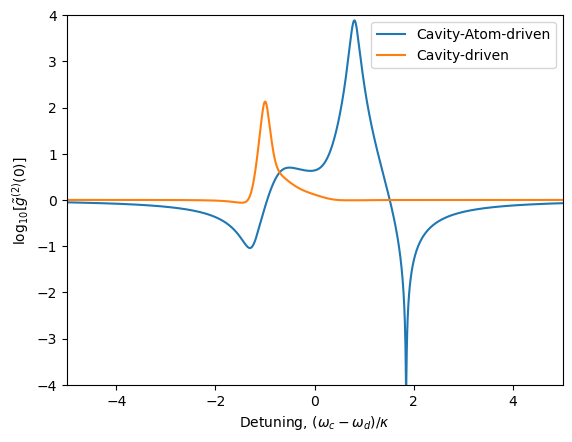

In [9]:
plt.plot(ωc-ωd, np.log10(g2_dce),label='Cavity-Atom-driven')
plt.plot(ωc-ωd, np.log10(g2_dc),label='Cavity-driven')
plt.xlabel(r'Detuning, $(\omega_c-\omega_d)/\kappa$')
plt.ylabel(r'$\log_{10}[\tilde{g}^{(2)}(0)]$')
plt.ylim([-4, 4])
plt.xlim([-5, 5])
plt.legend()
plt.show()

### Figure 4.(c)

In [10]:
g3_dce = result2.calculate_quantity('c1'*3)
g4_dce = result2.calculate_quantity('c1'*4)
g5_dce = result2.calculate_quantity('c1'*5)

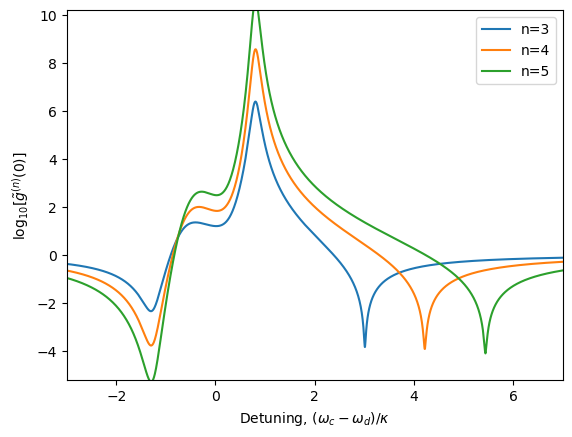

In [12]:
plt.plot(ωc-ωd, np.log10(g3_dce),label='n=3')
plt.plot(ωc-ωd, np.log10(g4_dce),label='n=4')
plt.plot(ωc-ωd, np.log10(g5_dce),label='n=5')
plt.xlabel(r'Detuning, $(\omega_c-\omega_d)/\kappa$')
plt.ylabel(r'$\log_{10}[\tilde{g}^{(n)}(0)]$')
plt.ylim([-5.2, 10.2])
plt.xlim([-3, 7])
plt.legend()
plt.show()

### Figure 4.(b)
$$\omega_c=\omega_e,\Omega_1 = \Omega_2,
ω_1 = ω_c + \pi*\kappa/4,
ω_2 = ω_c - \pi*\kappa/4$$

In [13]:
# system parameters
ωc = 0
ωe = ωc
η = 1
ω1 = ωc + np.pi*κ/4
ω2 = ωc - np.pi*κ/4
tlist = np.linspace(80, 100, 10000)

In [14]:
# create effective Hamiltonian
Heff = []
Heff.append([(ωc-1j*κ/2), ('ad', 0), ('a', 0)])
Heff.append([(ωe-1j*γ/2), ('sp', 0), ('sm', 0)])
Heff.append([g, ('ad', 0), ('sm', 0)])
Heff.append([g, ('a', 0), ('sp', 0)])

In [15]:
# create Input and output channels
Input1 = qcs.Input_channel('b1', mode1, ω1)
Input2 = qcs.Input_channel('b2', mode2, ω2)

Output = qcs.Output_channel('c1', mode1)

In [16]:
# calculated dynamical second-order ETCF
result3 = qcs(Heff, [Input1, Input2], Output, ratio=[1/np.sqrt(κ/2), η/np.sqrt(γ/2)])
gt2_dce = result3.calculate_quantity('c1c1', tlist)

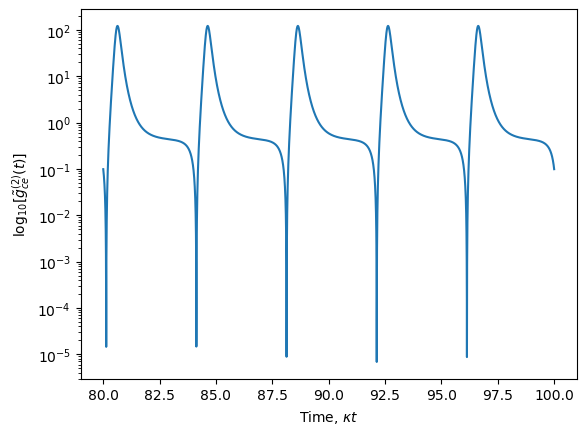

In [17]:
plt.semilogy(tlist, gt2_dce)
plt.xlabel(r'Time, $\kappa t$')
plt.ylabel(r'$\log_{10}[\tilde{g}^{(2)}_{ce}(t)]$')
plt.show()